# **Salary Data Prediction**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Salary_Data.csv')

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.shape

(30, 2)

In [7]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [8]:
x = data.iloc[:,:1].values
y = data.iloc[:,1:2].values

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [11]:
print(y_pred)
print(y_test)

[[115790.21011287]
 [ 71498.27809463]
 [102596.86866063]
 [ 75267.80422384]
 [ 55477.79204548]
 [ 60189.69970699]]
[[112635.]
 [ 67938.]
 [113812.]
 [ 83088.]
 [ 64445.]
 [ 57189.]]


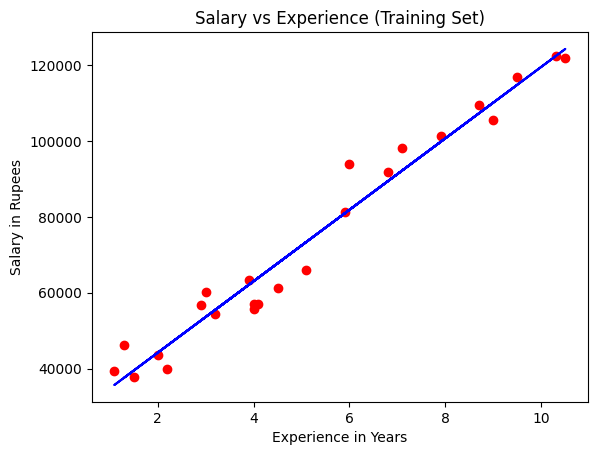

In [12]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in Rupees')
plt.show()

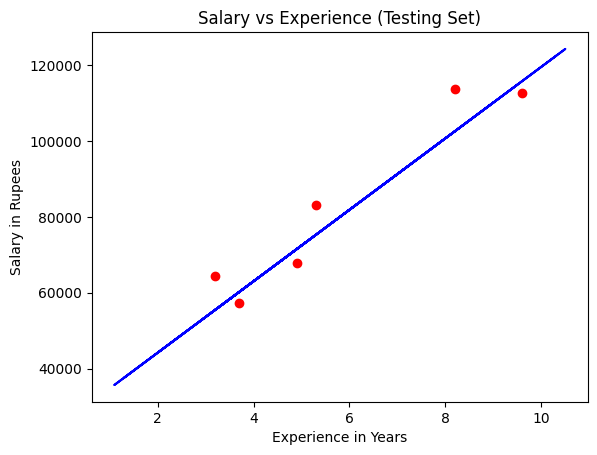

In [13]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Salary vs Experience (Testing Set)')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in Rupees')
plt.show()

# **Taxi Fare Prediction**

In [14]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("chicago_taxi_trips.csv")

df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [16]:
df.columns = df.columns.str.strip()

In [17]:
df = df[(df['Fare'] > 0) & (df['Trip Miles'] > 0) & (df['Trip Seconds'] > 0)]
df = df.dropna(subset=['Trip Start Timestamp', 'Trip Miles', 'Trip Seconds', 'Fare', 'Payment Type'])

In [18]:
df['Trip Start Timestamp'] = pd.to_datetime(
    df['Trip Start Timestamp'],
    format="%m/%d/%Y %I:%M:%S %p",
    errors='coerce'
)

In [19]:
df['Hour'] = df['Trip Start Timestamp'].dt.hour
df['DayOfWeek'] = df['Trip Start Timestamp'].dt.dayofweek

In [20]:
df = pd.get_dummies(df, columns=['Payment Type'], drop_first=True)

In [21]:
df['Pickup Community Area'] = df['Pickup Community Area'].fillna(-1)
df['Dropoff Community Area'] = df['Dropoff Community Area'].fillna(-1)

In [22]:
features = [
    'Trip Miles', 'Trip Seconds', 'Hour', 'DayOfWeek',
    'Pickup Community Area', 'Dropoff Community Area'
] + [col for col in df.columns if col.startswith('Payment Type_')]

In [23]:
X = df[features]
y = df['Fare']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

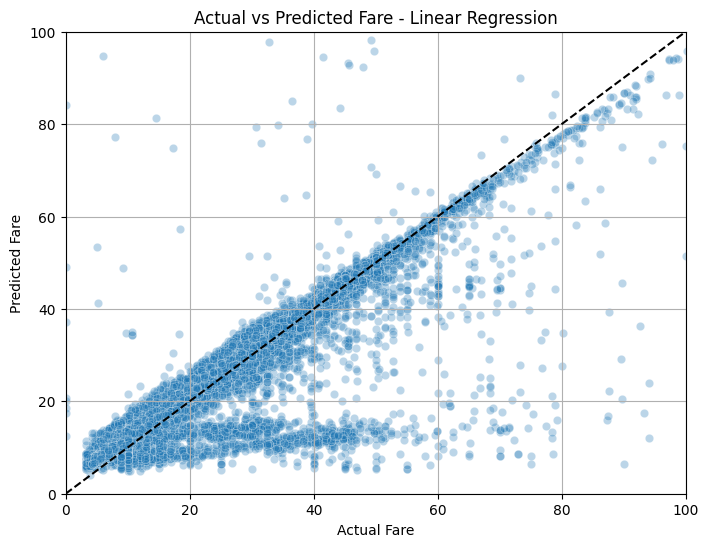

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([0, 100], [0, 100], 'k--', label='Perfect Prediction')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare - Linear Regression")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

# **Body Weight Prediction**

In [34]:
df = pd.read_csv("body_data.csv")

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Gender']]
y = df['Weight']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/tmp/ipython-input-41-2732217021.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


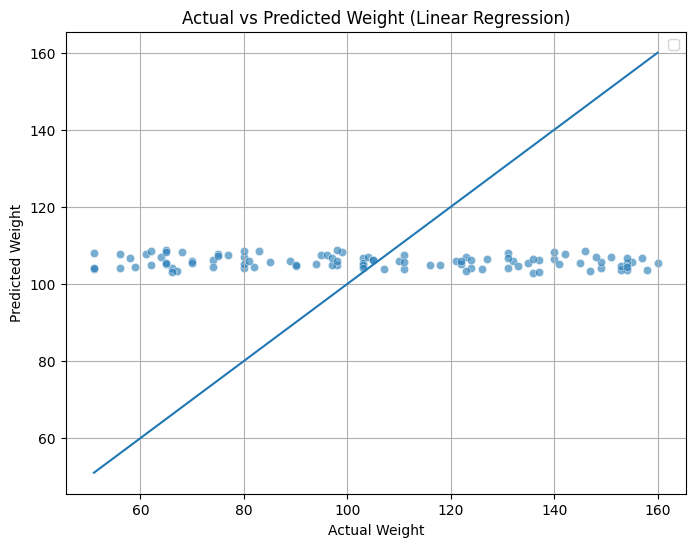

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()